In [10]:
from keras.utils import to_categorical
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.datasets import fashion_mnist
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
from keras.regularizers import l2
from keras.optimizers import Adam
from matplotlib import pyplot as plt

In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1).astype('float32') / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=13)

print("Fashion MNIST dataset loaded and preprocessed.")

4422102/4422102 [==============================] - 0s 0us/step
Fashion MNIST dataset loaded and preprocessed.


In [3]:
batch_size = 256
num_classes = 10
epochs = 50
img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1) 
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=input_shape,
                 kernel_regularizer=l2(0.001))) 
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001))) 
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.001))) 
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001))) 
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 26, 26, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 11, 11, 64)        2

In [7]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=Adam(),
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_val, y_val))

score = model.evaluate(X_test, y_test, verbose=0)

Epoch 1/50
188/188 [==============================] - 5s 16ms/step - loss: 0.3731 - accuracy: 0.9156 - val_loss: 0.3904 - val_accuracy: 0.9111
Epoch 2/50
188/188 [==============================] - 2s 13ms/step - loss: 0.3634 - accuracy: 0.9180 - val_loss: 0.3632 - val_accuracy: 0.9190
Epoch 3/50
188/188 [==============================] - 2s 13ms/step - loss: 0.3645 - accuracy: 0.9177 - val_loss: 0.3642 - val_accuracy: 0.9205
Epoch 4/50
188/188 [==============================] - 2s 13ms/step - loss: 0.3635 - accuracy: 0.9173 - val_loss: 0.3696 - val_accuracy: 0.9172
Epoch 5/50
188/188 [==============================] - 2s 12ms/step - loss: 0.3673 - accuracy: 0.9169 - val_loss: 0.3653 - val_accuracy: 0.9192
Epoch 6/50
188/188 [==============================] - 2s 12ms/step - loss: 0.3675 - accuracy: 0.9164 - val_loss: 0.3590 - val_accuracy: 0.9218
Epoch 7/50
188/188 [==============================] - 2s 13ms/step - loss: 0.3653 - accuracy: 0.9163 - val_loss: 0.3630 - val_accuracy: 0.9163

In [5]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.38825711607933044
Test accuracy: 0.9103000164031982


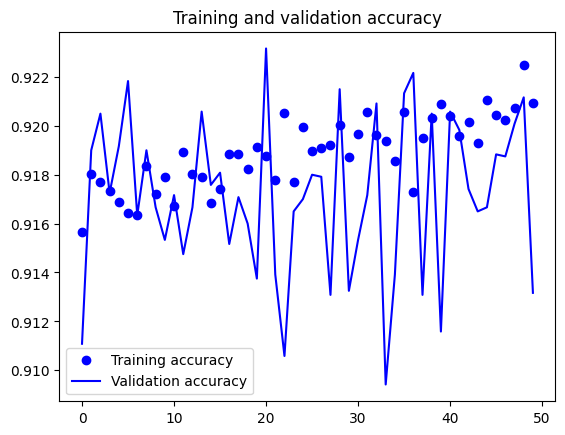

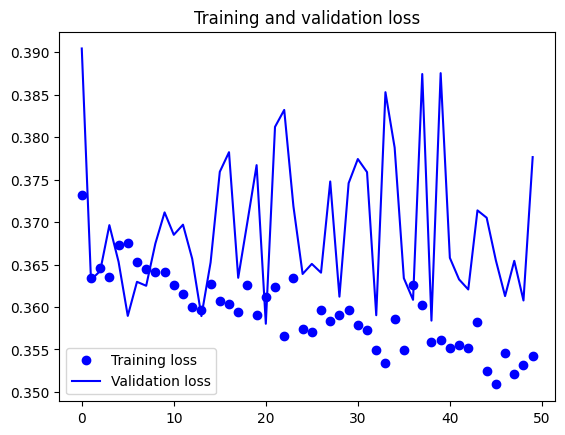

In [11]:
accuracy = history.history['accuracy'] 
val_accuracy = history.history['val_accuracy']  
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [12]:
model.save_weights('model_weights.h5')
